In [1]:
import cv2
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%run my_models.py

In [2]:
img_c, img_w, img_h = 1, 28, 28
num_classes = 26

# Select model version and load weights
def select_model(version):
    if version==1:
        model = SignMnistModel(img_w*img_h,num_classes)
        model.load_state_dict(torch.load('./models/classifier_v1.pth',map_location='cpu'))
    if version==2:
        model = SignMnistCNNModel(img_c,num_classes)
        model.load_state_dict(torch.load('./models/classifier_v2.pth',map_location='cpu'))
    if version==3:
        model = ResNet9(img_c,num_classes)
        model.load_state_dict(torch.load('./models/classifier_v3_100.pth',map_location='cpu'))
    return model

def int_to_char(num):
    return chr(num+65)
    
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

# Load my own ASL alphabet
def load_alphabet(path):
    my_test = []
    for i in range(num_classes):
        imgname = path+'/'+int_to_char(i)+'.jpg'
        if os.path.isfile(imgname) == False:
          continue
        img = cv2.imread(imgname, 0)
        img = cv2.resize(img, (img_w,img_h))
        img = np.array(img)
        img = torch.from_numpy(img).type(torch.FloatTensor)
        img = torch.reshape(img, (img_c, img_w, img_h))
        my_test.append((img, i))
    return my_test

# Predict my alphabet with loaded model
def plot_prediction(my_test):
  plt.figure(figsize=(15,12))
  for i in range(len(my_test)):
      plt.subplot(4,6,i+1)
      image, label = my_test[i]
      plt.imshow(image[0], cmap='gray')
      lbl = 'Label:'+int_to_char(label)+', Predicted:'+int_to_char(predict_image(image, model))
      plt.xlabel(lbl)
  plt.show()

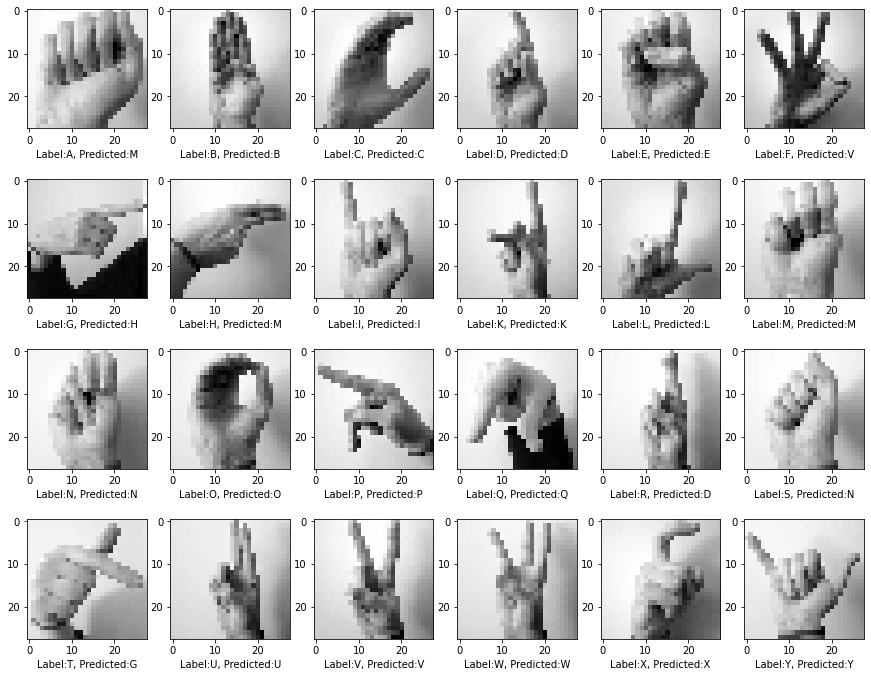

In [3]:
# Load the model weights
model = select_model(3)
# Show predictions
plot_prediction(load_alphabet('./my_alphabet'))